# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

Tujuan utama dari bagging ialah mengurangi varians sedangkan boosting untuk mengurangi bias. Fokus dari bagging ialah stabilitas model namun akurasi tinggi menjadi fokus dari boosting. Bagging jarang memiliki resiko underfitting tetapi Boosting bisa terjadi resiko overfitting.

# Import Data & Libraries

In [1]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd

# untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# untuk split data & evaluasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# model dasar (weak learner)
from sklearn.tree import DecisionTreeClassifier

# ensemble models (nanti kita bandingkan)
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

In [2]:
# import data dari datasets.load_breast_cancer
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# tampilkan 5 data teratas
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# gunakan RandomForestClassifier dari sklearn
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# prediksi data test
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Accuracy: {accuracy_score(y_test, preds):.3f}")

Accuracy: 0.965


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feature = n_feature
        self.random_state = random_state
        self.trees = []
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)  # shape: (n_samples, n_trees)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

## Predict Using Random Forest

In [6]:
# fungsi untuk menghitung akurasi
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# inisialisasi dan latih model RandomForest buatan sendiri
clf = RandomForest(n_trees=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# prediksi data uji
predictions = clf.predict(X_test)

# tampilkan akurasi
print(f"Accuracy: {accuracy(y_test, predictions):.3f}")

Accuracy: 0.947


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [7]:
# define and train the model using GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# inisialisasi model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# latih model
gb_clf.fit(X_train, y_train)

# lakukan prediksi
preds = gb_clf.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Accuracy: {accuracy_score(y_test, preds):.3f}")

Accuracy: 0.956


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# fungsi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner

    def fit(self, X, y, **params):
        self.base_models = []

        # initial prediction (Fm_0)
        Fm = np.zeros_like(y, dtype=float)

        # setup plot
        fig, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            # residual (negative gradient)
            r_i = y - sigmoid(Fm)

            # fit weak learner
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update model
            Fm += self.lr * h_i.predict(X)

            # plotting
            axs[i].scatter(range(len(y)), y, label="True", color='blue', alpha=0.5)
            axs[i].scatter(range(len(y)), sigmoid(Fm), label="Pred", color='red', alpha=0.5)
            axs[i].set_title(f"Iteration {i+1}")
            axs[i].set_ylim(-0.1, 1.1)

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)
        return (probs >= 0.5).astype(int)

## Predict Using Gradient Boosting

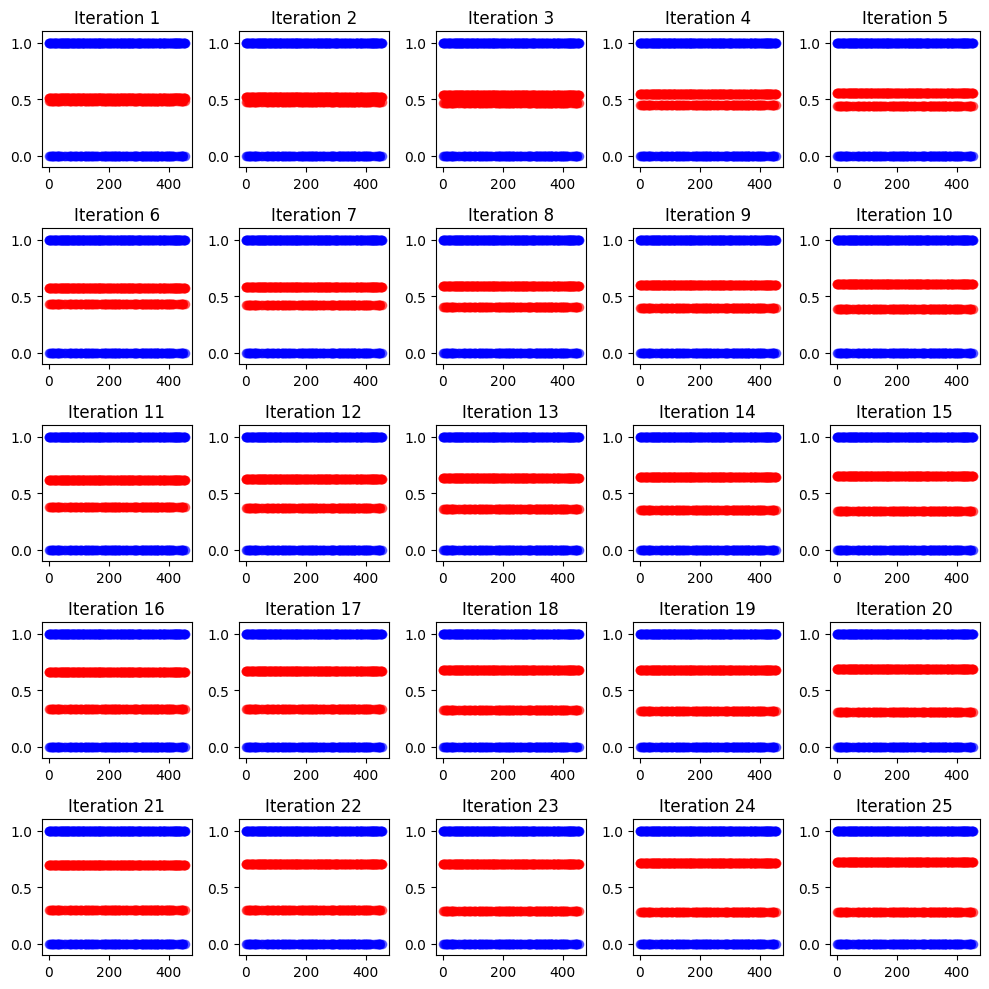

Accuracy: 0.939


In [9]:
# define and train the model
gb = gradientBoostingClassifier(lr=0.1, n_estimators=25)
gb.fit(X_train, y_train)

# lakukan prediksi
y_pred = gb.predict(X_test)

# hitung akurasi
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.3f}")

In [10]:
# get predictions:
preds = gb.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Accuracy: {np.mean(preds == y_test):.3f}")

Accuracy: 0.939


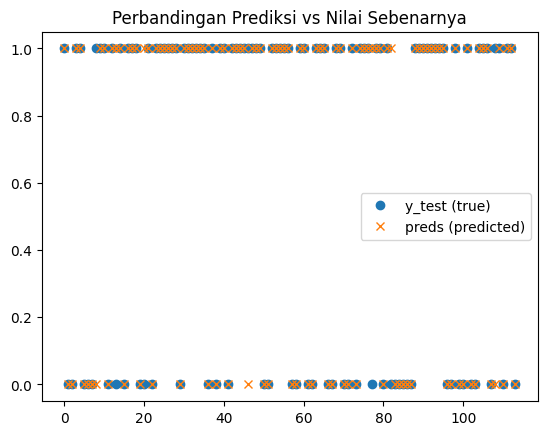

In [13]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('Perbandingan Prediksi vs Nilai Sebenarnya')
ax.plot(y_test, 'o', label='y_test (true)')
ax.plot(preds, 'x', label='preds (predicted)')
ax.legend()
plt.show()